In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None) # display all columns
pd.set_option("display.max_rows", 200)
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [2]:
data=pd.read_csv("account_train.csv")

In [3]:
data.head(50)

,AccID,CategoryID,Category,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID,Label
0,c8f5a7fa-4b2b-470f-8ad5-1c367a3c934a,1,Residential,2674700,585,43717,729,43416,4342,0,0,0.99,0.00,0,0,0
1,95daa45d-3dfd-4c60-aae4-05e78b0de26e,1,Residential,36000,315,378,3,522,522,0,0,1.38,0.00,0,0,0
2,40536c2d-c0a2-4486-b0aa-60b36dfa290a,1,Residential,700000,528,25150,345,25104,349,0,0,1.00,0.00,10715,1,0
3,52a2254d-44e5-4dc9-8e08-1b135096172c,5,Municipal,40000,0,4773,133,0,0,7319,0,0.00,1.53,0,1,1
4,1e0363e4-2029-4b62-a9ec-d909cee000cb,1,Residential,125800,0,-4,0,445,445,0,0,-121.26,0.00,0,0,0
5,eb80678a-d0e1-48df-9229-fcd9c706874d,2,Business,700000,577,17771,212,17588,1466,0,0,0.99,0.00,0,0,0
6,5b47579d-a965-415b-8eac-1565dd327839,2,Business,50000,1915,953,73,953,191,0,0,1.00,0.00,0,0,0
7,f8984e3d-a6bb-48ca-9209-a44dcccf91d4,8,Infrastructure,47000,58720,-1820,-130,0,0,1820,0,0.00,-1.00,0,0,1
8,80707e33-72d5-49fd-a415-0818a2d44e04,1,Residential,0,1061,29,2,0,0,933,0,0.00,32.73,0,1,1
9,b8e3fb51-f821-4460-9ecc-1cb95c6191f3,1,Residential,19000,226,72,1,0,0,0,0,0.00,0.00,0,0,0


In [4]:
data.isnull().sum() #no missing value

AccID                   0
CategoryID              0
Category                0
Value                   0
PropertySize            0
BillingAmt              0
AverageBillingAmt       0
CollectedAmt            0
AverageCollectedAmt     0
DebtAmt                 0
WriteOffAmt             0
CollectionRatio         0
DebtBillingRatio        0
TotalElectricityBill    0
HasID                   0
Label                   0
dtype: int64

In [5]:
data.shape

(100476, 16)

In [6]:
data["CategoryID"].unique()

array([ 1,  5,  2,  8, 11,  4,  6, 12,  7,  3,  9, 13], dtype=int64)

In [7]:
data["Category"].unique()

array(['Residential', 'Municipal', 'Business', 'Infrastructure',
       'Unknown', 'Agricultural', 'Government', 'Place of Worship',
       'Educational', 'Industry', 'Public Benefit',
       'Environmental Management'], dtype=object)

In [8]:
data_x=data[data["Category"]== "Unknown"] #keep the unknown 
data_x

,AccID,CategoryID,Category,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID,Label
10,d88ba925-12d2-45aa-98f6-108edaf3cc76,11,Unknown,0,0,114,9,0,0,7510,0,0.00,66.12,0,0,1
19,2f05be78-29eb-4789-8073-3a7cfafbca32,11,Unknown,0,0,-2784,-398,0,0,2784,0,0.00,-1.00,0,1,1
34,4720b209-7cb8-46af-9b74-879f21280053,11,Unknown,0,0,-2352,-36,176,22,2592,0,-0.07,-1.10,0,1,1
36,8b866cac-39ad-4369-b27b-628394842bc7,11,Unknown,0,0,-4311,-1437,0,0,4311,0,0.00,-1.00,0,1,1
52,91cebaca-6bf1-40ac-a3d5-212763802b0f,11,Unknown,0,0,2206,60,3355,305,4834,0,1.52,2.19,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100448,ff8b70a7-48a8-4b14-815a-4255d4b48664,11,Unknown,165000,320,7445,103,0,0,92537,0,0.00,12.43,0,0,1
100460,9be30d56-337e-4f88-92df-19b6d518d7b4,11,Unknown,357000,264,8306,99,6000,3000,34071,0,0.72,4.10,0,0,1
100462,a3a11f4f-f576-4346-9b2e-8bf0c62318c8,11,Unknown,0,248,-1174,-21,120,60,0,0,-0.10,0.00,0,1,0
100467,1541b5cb-993c-405f-ba38-d9d548f91018,11,Unknown,0,0,1409,1409,0,0,0,0,0.00,0.00,0,1,0


In [9]:
data_em=data[data["Category"]== "Environmental Management"] #there is no Environmental Management value at the test data so we can drop the rows that have Environmental Management
data_em

,AccID,CategoryID,Category,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID,Label
78102,893c2524-5290-4b3c-8b35-0843eec9bb60,13,Environmental Management,1800000,210387,548,42,557,557,0,0,1.02,0.00,0,0,0
79815,85ab0797-4e11-45b0-8e8b-f08c7c9656ca,13,Environmental Management,2700000,0,-626,-42,0,0,554,0,0.00,-0.88,0,0,1


In [10]:
data.drop(data_em.index, axis=0, inplace=True)

In [11]:
data["CategoryID"].nunique()

11

In [12]:
data["Category"].nunique()

11

In [13]:
data.drop(columns=["CategoryID","AccID"],inplace=True) # Category and CategoryID is same so drop one of them

In [14]:
data.duplicated().sum() #no duplicated column

0

In [15]:
data.dtypes

Category                 object
Value                     int64
PropertySize              int64
BillingAmt                int64
AverageBillingAmt         int64
CollectedAmt              int64
AverageCollectedAmt       int64
DebtAmt                   int64
WriteOffAmt               int64
CollectionRatio         float64
DebtBillingRatio        float64
TotalElectricityBill      int64
HasID                     int64
Label                     int64
dtype: object

In [16]:
data["Category"]=data["Category"].astype("category")

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Value,100474.0,706990.040379,3.047485e+06,0.0,35000.0,93000.0,750000.00,421860000.0
PropertySize,100474.0,746835.479169,5.651614e+06,0.0,276.0,511.0,1162.00,270515963.0
BillingAmt,100474.0,10899.731821,1.262354e+05,-4232630.0,461.0,3141.0,8715.00,26133617.0
AverageBillingAmt,100474.0,575.497940,6.430373e+03,-79384.0,23.0,107.0,281.00,805044.0
CollectedAmt,100474.0,9763.834295,1.201461e+05,-219260.0,0.0,360.0,7402.75,24371134.0
AverageCollectedAmt,100474.0,2044.722943,3.682523e+04,-219260.0,0.0,100.0,768.00,6828297.0
DebtAmt,100474.0,9642.686496,5.003061e+04,0.0,0.0,0.0,2298.00,6322610.0
WriteOffAmt,100474.0,602.777325,1.440929e+04,0.0,0.0,0.0,0.00,4306605.0
CollectionRatio,100474.0,19.536586,5.557047e+03,-115000.0,0.0,0.5,1.00,1701912.0
DebtBillingRatio,100474.0,18.633273,6.274782e+03,-436506.0,0.0,0.0,1.28,1836304.0


In [18]:
data["HasID"]=data["HasID"].astype("category")

In [19]:
data["Label"]=data["Label"].astype("category")

In [20]:
df=data.copy()

In [21]:
df.columns

Index(['Category', 'Value', 'PropertySize', 'BillingAmt', 'AverageBillingAmt',
       'CollectedAmt', 'AverageCollectedAmt', 'DebtAmt', 'WriteOffAmt',
       'CollectionRatio', 'DebtBillingRatio', 'TotalElectricityBill', 'HasID',
       'Label'],
      dtype='object')

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

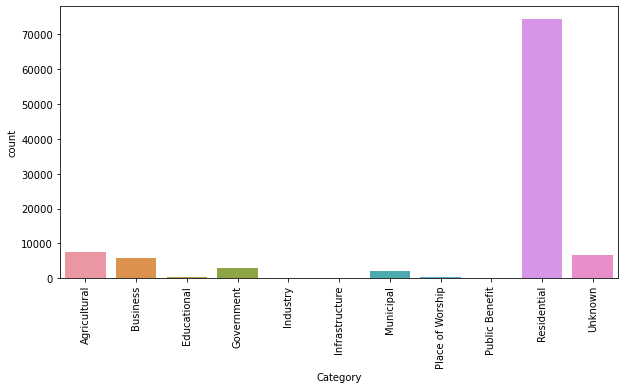

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(df["Category"]) #residential is more than other
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

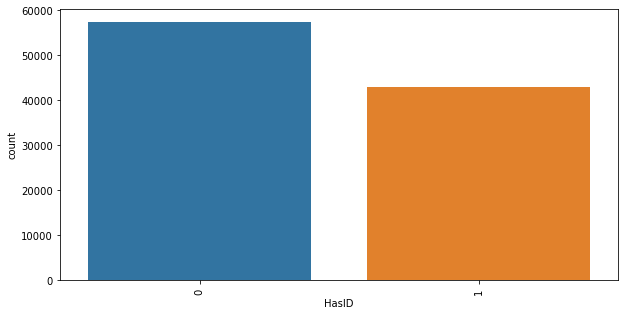

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(df["HasID"])
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

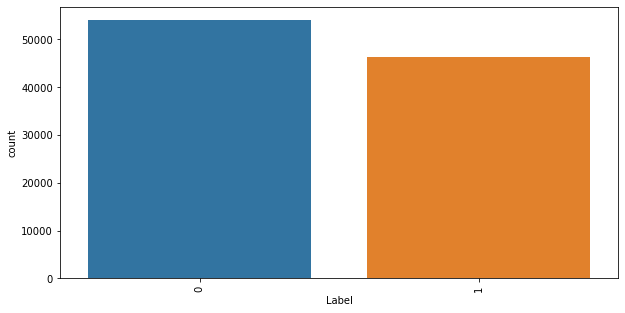

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(df["Label"])
plt.xticks(rotation=90)

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


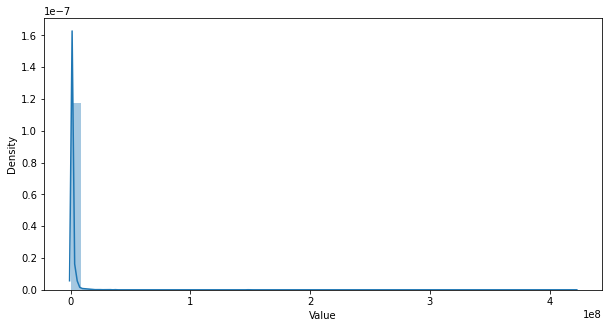

In [25]:
plt.figure(figsize=(10,5))
sns.distplot(df["Value"]) #it is skewed


C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


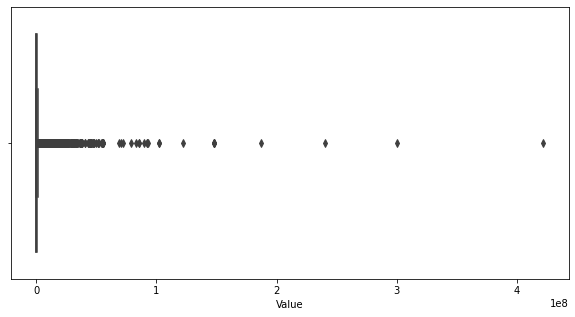

In [26]:
plt.figure(figsize=(10,5)) #there are outliers
sns.boxplot(df["Value"]) 

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


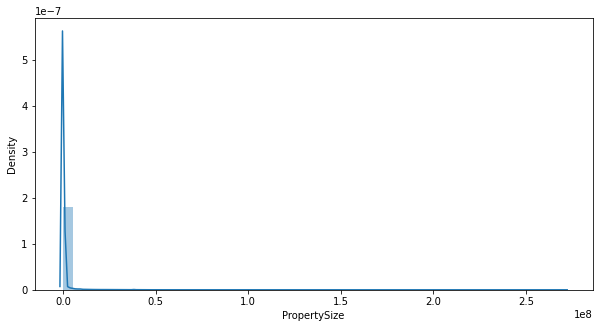

In [27]:
plt.figure(figsize=(10,5)) #it is skewed
sns.distplot(df["PropertySize"])

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


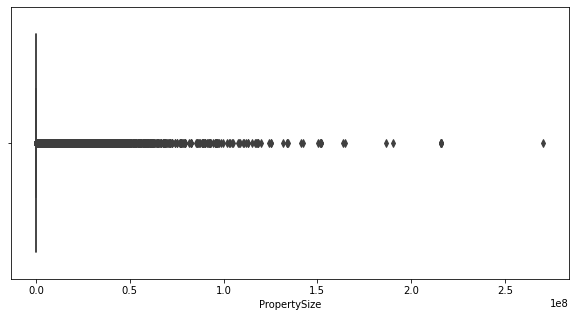

In [28]:
plt.figure(figsize=(10,5)) 
sns.boxplot(df["PropertySize"]) #there are outliers

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


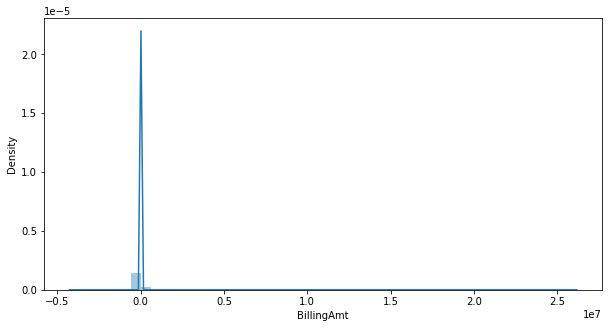

In [29]:
plt.figure(figsize=(10,5))
sns.distplot(df["BillingAmt"]) #it is skewed

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


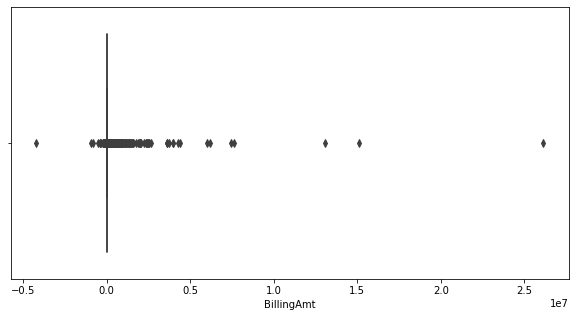

In [30]:
plt.figure(figsize=(10,5)) 
sns.boxplot(df["BillingAmt"]) #there are outliers

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


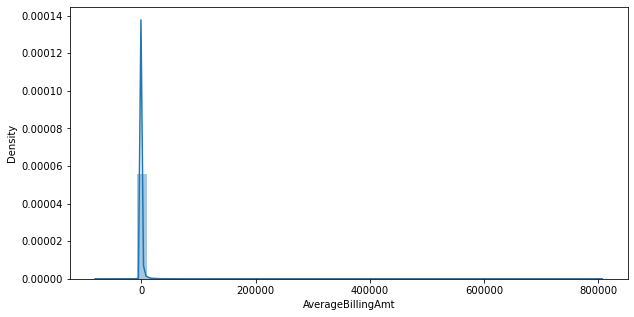

In [31]:
plt.figure(figsize=(10,5))
sns.distplot(df["AverageBillingAmt"]) #it is skewed

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


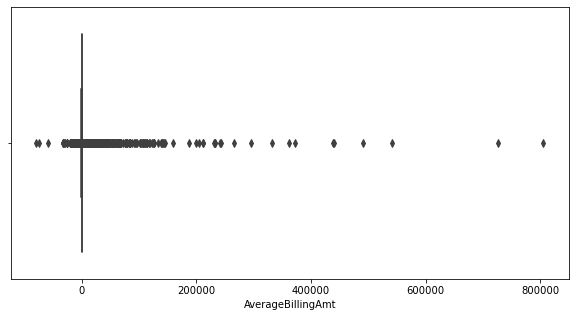

In [32]:
plt.figure(figsize=(10,5)) 
sns.boxplot(df["AverageBillingAmt"]) #there are outliers

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


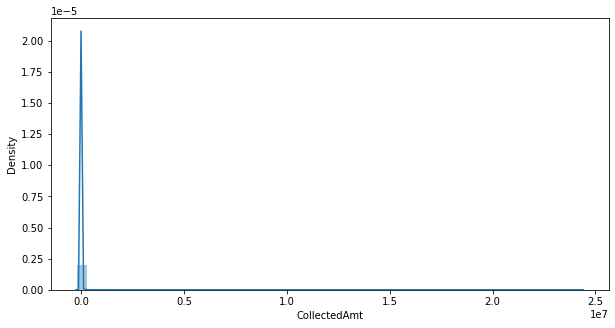

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(df["CollectedAmt"]) #it is skewed

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


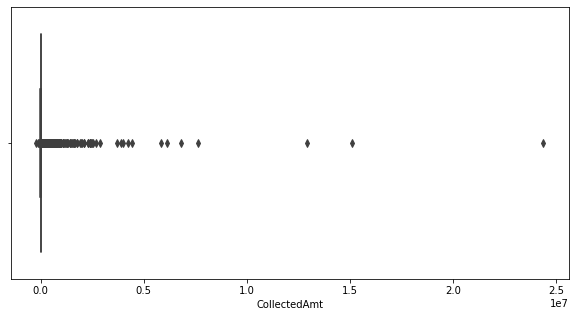

In [34]:
plt.figure(figsize=(10,5)) 
sns.boxplot(df["CollectedAmt"]) #there are outliers

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


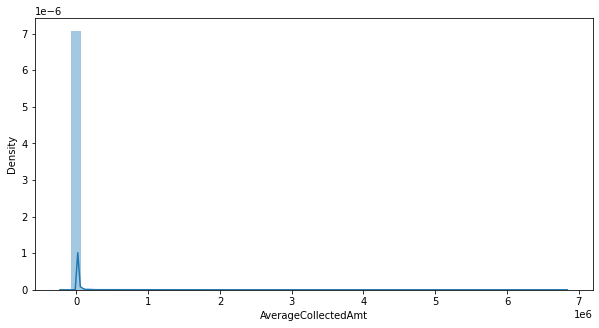

In [35]:
plt.figure(figsize=(10,5))
sns.distplot(df["AverageCollectedAmt"]) #it is skewed

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


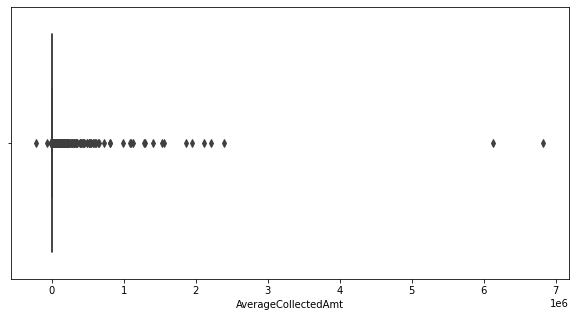

In [36]:
plt.figure(figsize=(10,5)) 
sns.boxplot(df["AverageCollectedAmt"]) #there are outliers

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


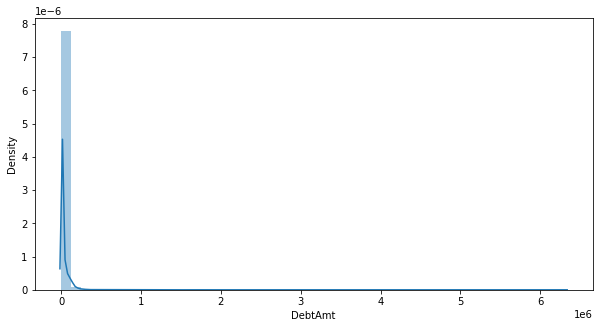

In [37]:
plt.figure(figsize=(10,5))
sns.distplot(df["DebtAmt"]) #it is skewed

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


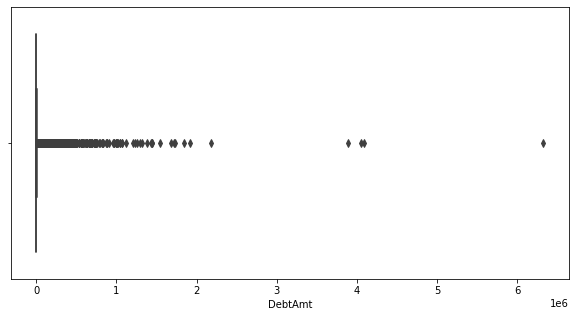

In [38]:
plt.figure(figsize=(10,5)) 
sns.boxplot(df["DebtAmt"]) #there are outliers

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


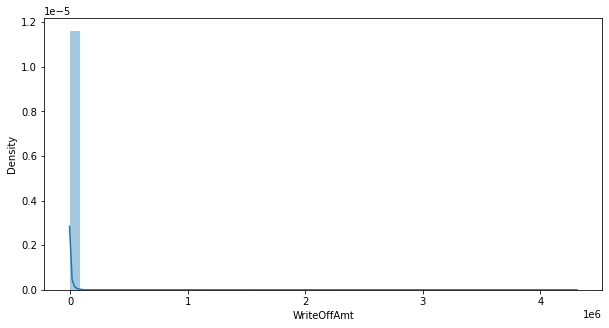

In [39]:
plt.figure(figsize=(10,5))
sns.distplot(df["WriteOffAmt"]) #it is skewed

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


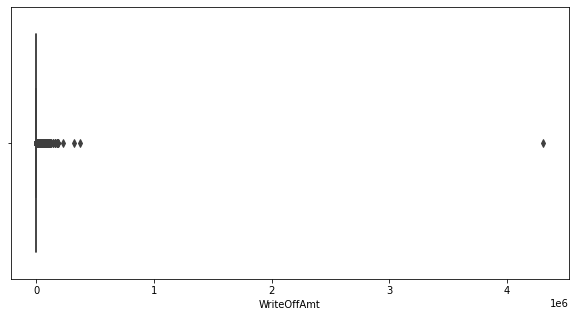

In [40]:
plt.figure(figsize=(10,5)) 
sns.boxplot(df["WriteOffAmt"]) #there are outliers

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


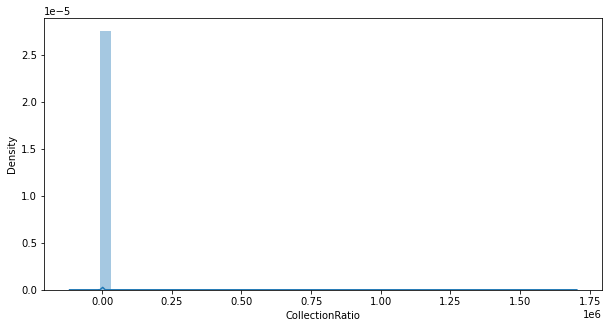

In [41]:
plt.figure(figsize=(10,5))
sns.distplot(df["CollectionRatio"]) #it is skewed

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


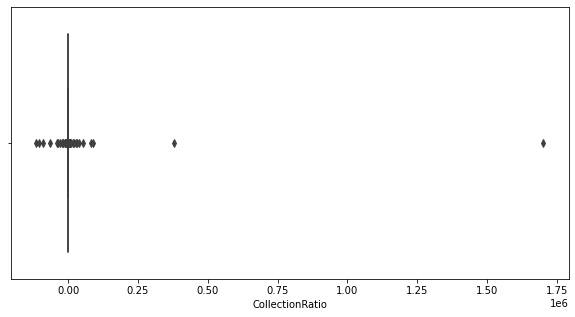

In [42]:
plt.figure(figsize=(10,5)) 
sns.boxplot(df["CollectionRatio"])

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


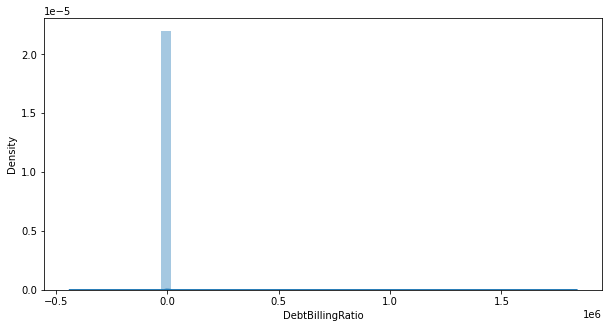

In [43]:
plt.figure(figsize=(10,5))
sns.distplot(df["DebtBillingRatio"]) #it is skewed

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


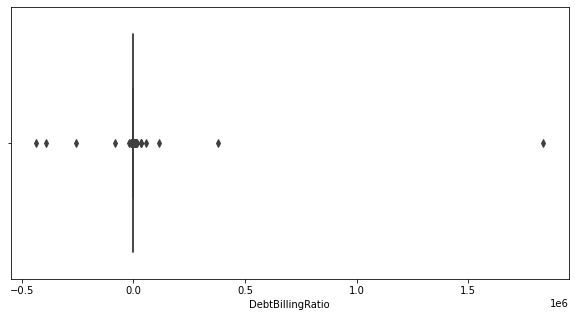

In [44]:
plt.figure(figsize=(10,5)) 
sns.boxplot(df["DebtBillingRatio"]) #there are outliers

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


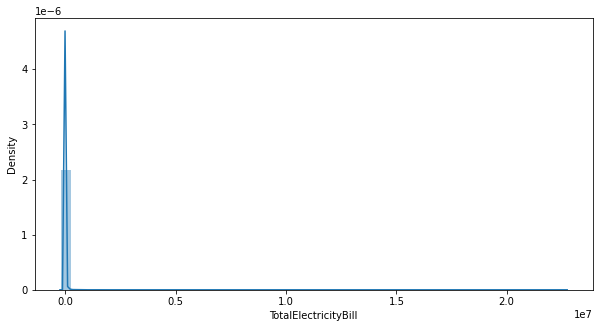

In [45]:
plt.figure(figsize=(10,5))
sns.distplot(df["TotalElectricityBill"]) #it is skewed

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


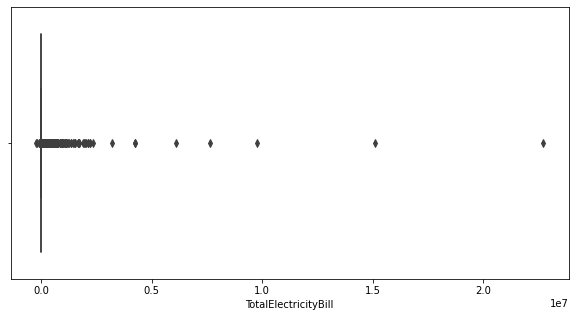

In [46]:
plt.figure(figsize=(10,5)) 
sns.boxplot(df["TotalElectricityBill"]) #there are outliers

In [47]:
df.corr()

,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill
Value,1.000000,0.217937,0.309329,0.289516,0.324783,0.369737,0.018016,-0.006898,-0.000485,-0.000513,0.156508
PropertySize,0.217937,1.000000,0.006703,0.066198,0.006320,0.017601,-0.007068,-0.005475,-0.000442,-0.000376,0.008728
BillingAmt,0.309329,0.006703,1.000000,0.443106,0.974105,0.443766,0.080196,-0.000026,-0.000290,-0.000243,0.938904
AverageBillingAmt,0.289516,0.066198,0.443106,1.000000,0.425571,0.294307,0.080129,-0.003195,-0.000300,-0.000253,0.362148
CollectedAmt,0.324783,0.006320,0.974105,0.425571,1.000000,0.460290,0.008343,-0.001129,0.000666,-0.000200,0.949192
AverageCollectedAmt,0.369737,0.017601,0.443766,0.294307,0.460290,1.000000,0.009710,-0.000345,0.002703,-0.000147,0.333584
DebtAmt,0.018016,-0.007068,0.080196,0.080129,0.008343,0.009710,1.000000,0.107975,-0.000566,0.000583,0.011206
WriteOffAmt,-0.006898,-0.005475,-0.000026,-0.003195,-0.001129,-0.000345,0.107975,1.000000,-0.000146,0.009090,-0.001037
CollectionRatio,-0.000485,-0.000442,-0.000290,-0.000300,0.000666,0.002703,-0.000566,-0.000146,1.000000,0.040979,-0.000138
DebtBillingRatio,-0.000513,-0.000376,-0.000243,-0.000253,-0.000200,-0.000147,0.000583,0.009090,0.040979,1.000000,-0.000122


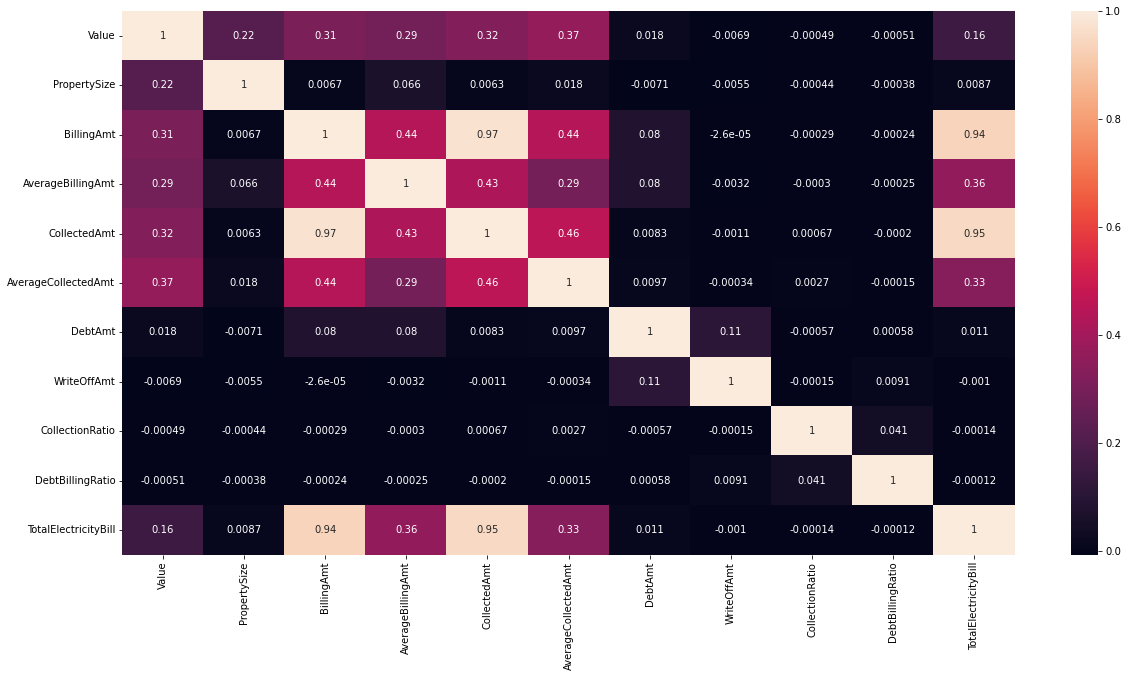

In [48]:
plt.figure(figsize=(20,10)) #there are high correlation between CollectedAmt and BillingAmt, BillingAmt and TotalElectricityBill, and CollectedAmt andTotalElectricityBill   
sns.heatmap(df.corr(), annot=True)

<Figure size 720x360 with 0 Axes>

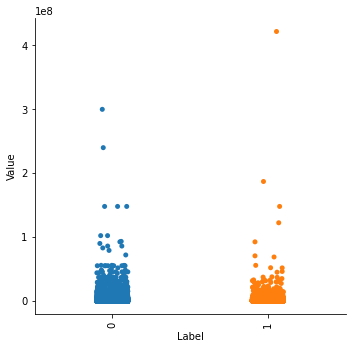

In [49]:
plt.figure(figsize=(10,5))
sns.catplot(data=df,x="Label", y="Value")
plt.xticks(rotation=90)
plt.show()

<Figure size 720x360 with 0 Axes>

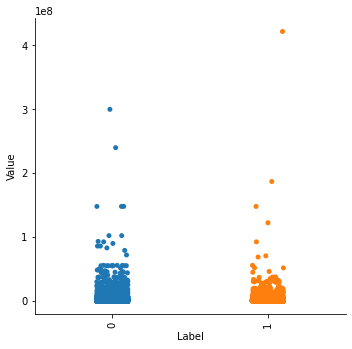

In [50]:
plt.figure(figsize=(10,5))
sns.catplot(data=df,x="Label", y="Value")
plt.xticks(rotation=90)
plt.show()

<Figure size 720x360 with 0 Axes>

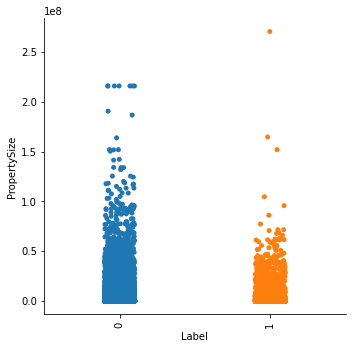

In [51]:
plt.figure(figsize=(10,5))
sns.catplot(data=df,x="Label", y="PropertySize")
plt.xticks(rotation=90)
plt.show()

<Figure size 720x360 with 0 Axes>

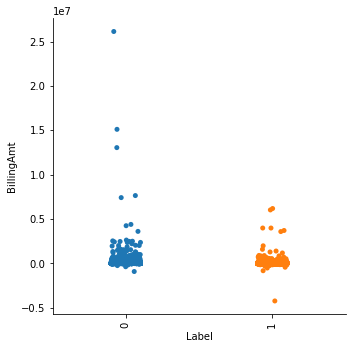

In [52]:
plt.figure(figsize=(10,5))
sns.catplot(data=df,x="Label", y="BillingAmt")
plt.xticks(rotation=90)
plt.show()

<Figure size 720x360 with 0 Axes>

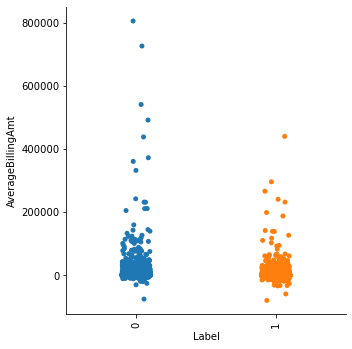

In [53]:
plt.figure(figsize=(10,5))
sns.catplot(data=df,x="Label", y="AverageBillingAmt")
plt.xticks(rotation=90)
plt.show()

<Figure size 720x360 with 0 Axes>

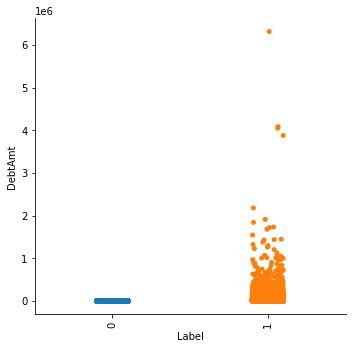

In [54]:
plt.figure(figsize=(10,5))
sns.catplot(data=df,x="Label", y="DebtAmt")
plt.xticks(rotation=90)
plt.show()

<Figure size 720x360 with 0 Axes>

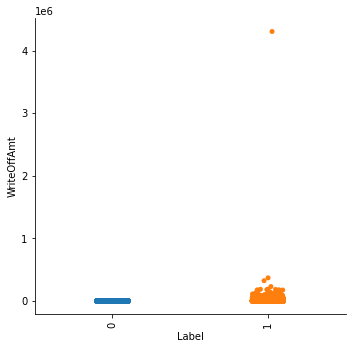

In [55]:
plt.figure(figsize=(10,5))
sns.catplot(data=df,x="Label", y="WriteOffAmt")
plt.xticks(rotation=90)
plt.show()

<Figure size 720x360 with 0 Axes>

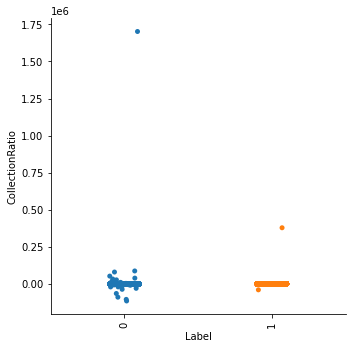

In [56]:
plt.figure(figsize=(10,5))
sns.catplot(data=df,x="Label", y="CollectionRatio")
plt.xticks(rotation=90)
plt.show()

<Figure size 720x360 with 0 Axes>

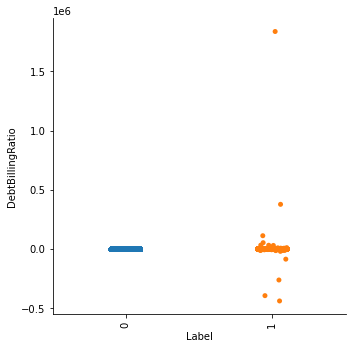

In [57]:
plt.figure(figsize=(10,5))
sns.catplot(data=df,x="Label", y="DebtBillingRatio")
plt.xticks(rotation=90)
plt.show()

<Figure size 720x360 with 0 Axes>

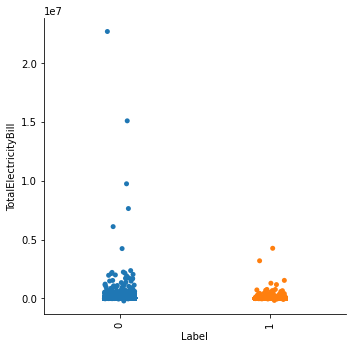

In [58]:
plt.figure(figsize=(10,5))
sns.catplot(data=df,x="Label", y="TotalElectricityBill")
plt.xticks(rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

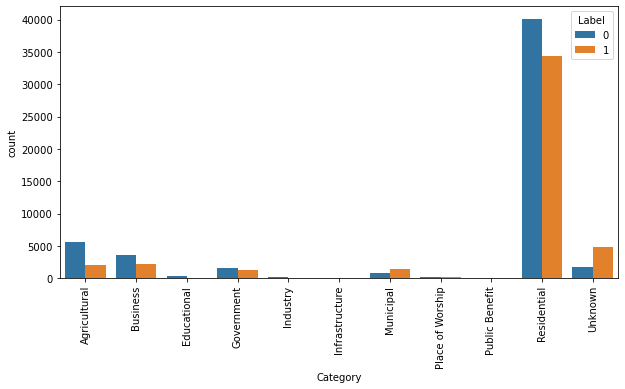

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Category", hue="Label")
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

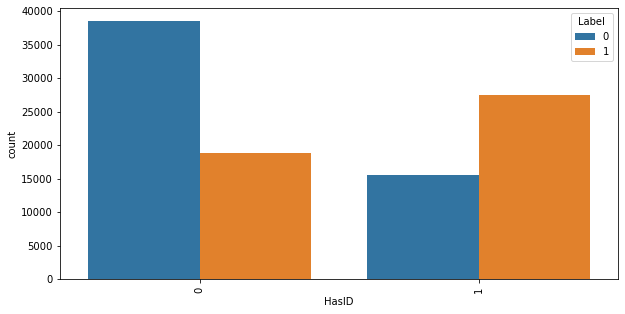

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="HasID", hue="Label")
plt.xticks(rotation=90)

# Data Processing

In [61]:
data_size=df[df["PropertySize"]== 0]
data_size.shape

(8832, 14)

In [62]:
df1=df.copy()

In [63]:
#df1.drop(data_size.index, axis=0, inplace=True)

In [64]:
data_val=df1[df1["Value"]== 0]


In [65]:
#df1.drop(data_val.index, axis=0, inplace=True)

In [66]:
 #drop the rows that have 0 value on the property size; property size cannot be 0

In [67]:
df1.shape

(100474, 14)

In [68]:
#df1.drop(columns=["BillingAmt"], inplace=True) #drop it because there is a high correlation between this variable and CollectedAmt

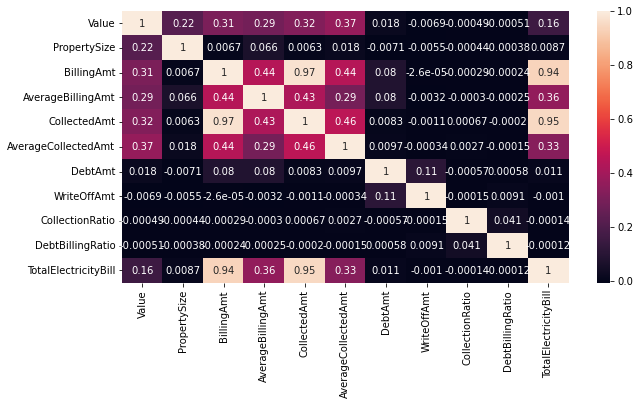

In [69]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), annot=True) #there is high correlation between CollectedAmt and TotalElectricityBill, but it is not a perfect correlation we can keep them


In [70]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Value,100474.0,706990.040379,3.047485e+06,0.0,35000.0,93000.0,750000.00,421860000.0
PropertySize,100474.0,746835.479169,5.651614e+06,0.0,276.0,511.0,1162.00,270515963.0
BillingAmt,100474.0,10899.731821,1.262354e+05,-4232630.0,461.0,3141.0,8715.00,26133617.0
AverageBillingAmt,100474.0,575.497940,6.430373e+03,-79384.0,23.0,107.0,281.00,805044.0
CollectedAmt,100474.0,9763.834295,1.201461e+05,-219260.0,0.0,360.0,7402.75,24371134.0
AverageCollectedAmt,100474.0,2044.722943,3.682523e+04,-219260.0,0.0,100.0,768.00,6828297.0
DebtAmt,100474.0,9642.686496,5.003061e+04,0.0,0.0,0.0,2298.00,6322610.0
WriteOffAmt,100474.0,602.777325,1.440929e+04,0.0,0.0,0.0,0.00,4306605.0
CollectionRatio,100474.0,19.536586,5.557047e+03,-115000.0,0.0,0.5,1.00,1701912.0
DebtBillingRatio,100474.0,18.633273,6.274782e+03,-436506.0,0.0,0.0,1.28,1836304.0


#### Variable transformation 

All numeric values skewed so I use np.arcsinh to handle negative and 0 values.

In [71]:
df1["Value" + "_arc"] = np.arcsinh(df1["Value"])

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


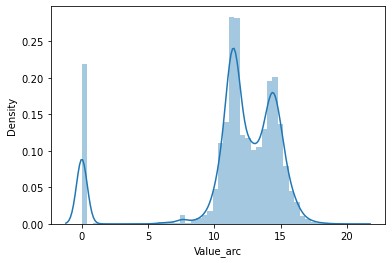

In [72]:
sns.distplot(df1["Value_arc"])

In [73]:
df1.drop("Value", axis=1, inplace=True)
df1.head()

,Category,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID,Label,Value_arc
0,Residential,585,43717,729,43416,4342,0,0,0.99,0.00,0,0,0,15.492495
1,Residential,315,378,3,522,522,0,0,1.38,0.00,0,0,0,11.184421
2,Residential,528,25150,345,25104,349,0,0,1.00,0.00,10715,1,0,14.151983
3,Municipal,0,4773,133,0,0,7319,0,0.00,1.53,0,1,1,11.289782
4,Residential,0,-4,0,445,445,0,0,-121.26,0.00,0,0,0,12.435596


In [74]:
df1["PropertySize" + "_arc"] = np.arcsinh(df1["PropertySize"])
df1.drop("PropertySize", axis=1, inplace=True)
df1.head()

,Category,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID,Label,Value_arc,PropertySize_arc
0,Residential,43717,729,43416,4342,0,0,0.99,0.00,0,0,0,15.492495,7.064760
1,Residential,378,3,522,522,0,0,1.38,0.00,0,0,0,11.184421,6.445722
2,Residential,25150,345,25104,349,0,0,1.00,0.00,10715,1,0,14.151983,6.962244
3,Municipal,4773,133,0,0,7319,0,0.00,1.53,0,1,1,11.289782,0.000000
4,Residential,-4,0,445,445,0,0,-121.26,0.00,0,0,0,12.435596,0.000000


C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


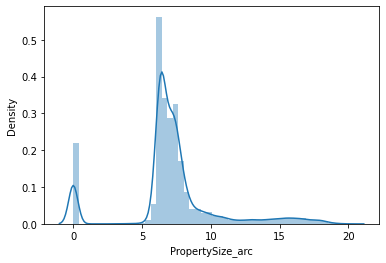

In [75]:
sns.distplot(df1["PropertySize_arc"])

In [76]:
df1["CollectedAmt" + "_arc"] = np.arcsinh(df1["CollectedAmt"])
df1.drop("CollectedAmt", axis=1, inplace=True)


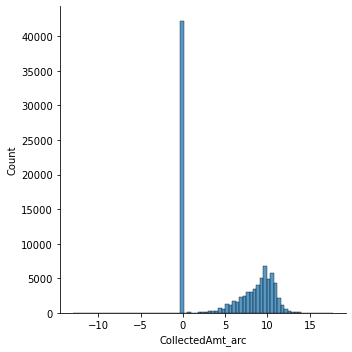

In [77]:
sns.displot(df1["CollectedAmt_arc"])

In [78]:
df1["BillingAmt" + "_arc"] = np.arcsinh(df1["BillingAmt"])
df1.drop("BillingAmt", axis=1, inplace=True)

In [79]:
df1["AverageCollectedAmt" + "_arc"] = np.arcsinh(df1["AverageCollectedAmt"])
df1.drop("AverageCollectedAmt", axis=1, inplace=True)

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


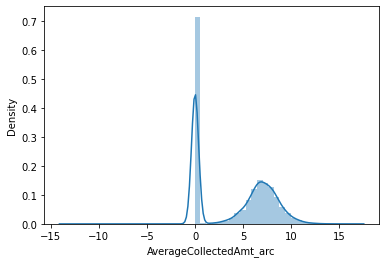

In [80]:
sns.distplot(df1["AverageCollectedAmt_arc"])

In [81]:
df1["DebtAmt" + "_arc"] = np.arcsinh(df1["DebtAmt"])
df1.drop("DebtAmt", axis=1, inplace=True)

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


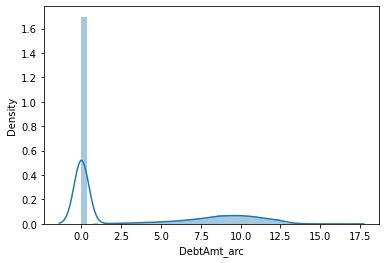

In [82]:
sns.distplot(df1["DebtAmt_arc"])

In [83]:
df1["WriteOffAmt" + "_arc"] = np.arcsinh(df1["WriteOffAmt"])
df1.drop("WriteOffAmt", axis=1, inplace=True)

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


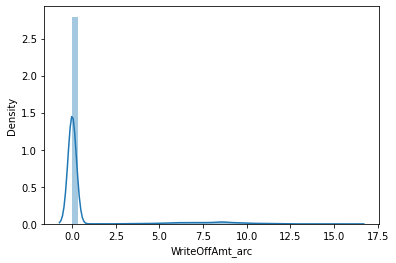

In [84]:
sns.distplot(df1["WriteOffAmt_arc"])

In [85]:
df1["CollectionRatio" + "_arc"] = np.arcsinh(df1["CollectionRatio"])
df1.drop("CollectionRatio", axis=1, inplace=True)

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


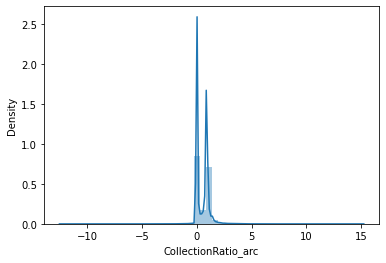

In [86]:
sns.distplot(df1["CollectionRatio_arc"])

In [87]:
df1["DebtBillingRatio" + "_arc"] = np.arcsinh(df1["DebtBillingRatio"])
df1.drop("DebtBillingRatio", axis=1, inplace=True)

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


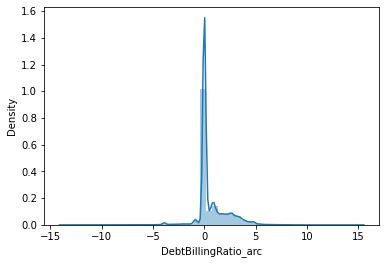

In [88]:
sns.distplot(df1["DebtBillingRatio_arc"])

In [89]:
df1["TotalElectricityBill" + "_arc"] = np.arcsinh(df1["TotalElectricityBill"])
df1.drop("TotalElectricityBill", axis=1, inplace=True)

C:\Users\kayaf\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


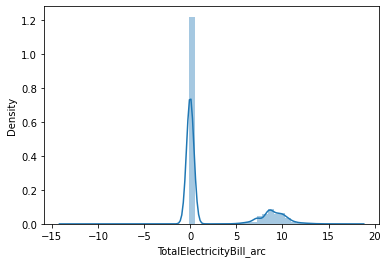

In [90]:
sns.distplot(df1["TotalElectricityBill_arc"])

In [91]:
df1["AverageBillingAmt" + "_arc"] = np.arcsinh(df1["AverageBillingAmt"])
df1.drop("AverageBillingAmt", axis=1, inplace=True)

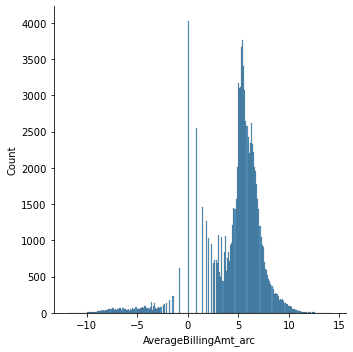

In [92]:
sns.displot(df1['AverageBillingAmt_arc'])

### Standardizing 

In [93]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [94]:
std_scaler = StandardScaler()

In [95]:
df1.columns

Index(['Category', 'HasID', 'Label', 'Value_arc', 'PropertySize_arc',
       'CollectedAmt_arc', 'BillingAmt_arc', 'AverageCollectedAmt_arc',
       'DebtAmt_arc', 'WriteOffAmt_arc', 'CollectionRatio_arc',
       'DebtBillingRatio_arc', 'TotalElectricityBill_arc',
       'AverageBillingAmt_arc'],
      dtype='object')

In [96]:
df1['PropertySize_arc'] = std_scaler.fit_transform(df1[['PropertySize_arc']])

In [97]:
df1['CollectedAmt_arc'] = std_scaler.fit_transform(df1[['CollectedAmt_arc']])
df1['AverageCollectedAmt_arc'] = std_scaler.fit_transform(df1[['AverageCollectedAmt_arc']])
df1['DebtAmt_arc'] = std_scaler.fit_transform(df1[['DebtAmt_arc']])
df1['WriteOffAmt_arc'] = std_scaler.fit_transform(df1[['WriteOffAmt_arc']])
df1['CollectionRatio_arc'] = std_scaler.fit_transform(df1[['CollectionRatio_arc']])
df1['DebtBillingRatio_arc'] = std_scaler.fit_transform(df1[['DebtBillingRatio_arc']])
df1['TotalElectricityBill_arc'] = std_scaler.fit_transform(df1[['TotalElectricityBill_arc']])
df1['AverageBillingAmt_arc'] = std_scaler.fit_transform(df1[['AverageBillingAmt_arc']])
df1['Value_arc'] = std_scaler.fit_transform(df1[['Value_arc']])
df1['BillingAmt_arc'] = std_scaler.fit_transform(df1[['BillingAmt_arc']])

In [98]:
df1.head()

,Category,HasID,Label,Value_arc,PropertySize_arc,CollectedAmt_arc,BillingAmt_arc,AverageCollectedAmt_arc,DebtAmt_arc,WriteOffAmt_arc,CollectionRatio_arc,DebtBillingRatio_arc,TotalElectricityBill_arc,AverageBillingAmt_arc
0,Residential,0,0,0.959394,-0.045559,1.336395,0.918474,1.334613,-0.764697,-0.334405,0.586413,-0.460857,-0.565815,0.887066
1,Residential,0,0,-0.106218,-0.229964,0.388106,-0.205954,0.767866,-0.764697,-0.334405,0.978633,-0.460857,-0.565815,-0.968029
2,Residential,1,0,0.627815,-0.076097,1.218892,0.787612,0.660159,-0.764697,-0.334405,0.597446,-0.460857,1.937600,0.633178
3,Municipal,1,1,-0.080157,-2.150086,-1.102850,0.394257,-1.091703,1.315761,-0.334405,-0.774254,0.372972,-0.565815,0.309701
4,Residential,0,0,0.203263,-2.150086,0.353873,-2.270560,0.725170,-0.764697,-0.334405,-9.320167,-0.460857,-0.565815,-1.585146


### Outliers

In [99]:
df1.dtypes

Category                    category
HasID                       category
Label                       category
Value_arc                    float64
PropertySize_arc             float64
CollectedAmt_arc             float64
BillingAmt_arc               float64
AverageCollectedAmt_arc      float64
DebtAmt_arc                  float64
WriteOffAmt_arc              float64
CollectionRatio_arc          float64
DebtBillingRatio_arc         float64
TotalElectricityBill_arc     float64
AverageBillingAmt_arc        float64
dtype: object

In [100]:
Q1 = df1.quantile(0.25)  
Q3 = df1.quantile(0.75)

IQR = Q3 - Q1  

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [101]:
(
    (df1.select_dtypes(include=["float64"]) < lower)
    | (df1.select_dtypes(include=["float64"]) > upper) #there are outliers but i want to keep these first 
).sum() / len(df1) * 100

Value_arc                    9.151621
PropertySize_arc            20.446086
CollectedAmt_arc             0.000000
BillingAmt_arc               8.011028
AverageCollectedAmt_arc      0.001991
DebtAmt_arc                  0.000000
WriteOffAmt_arc             10.791847
CollectionRatio_arc          1.452117
DebtBillingRatio_arc        13.432331
TotalElectricityBill_arc     0.305552
AverageBillingAmt_arc        9.656229
dtype: float64

In [102]:
df2=df1.copy()

#### Data Preparation

In [103]:
X = df2.drop(["Label"], axis=1)

Y = df2["Label"]

X = pd.get_dummies(X, columns=["Category"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [104]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (70331, 22)
Shape of test set :  (30143, 22)
Percentage of classes in training set:
0    0.538198
1    0.461802
Name: Label, dtype: float64
Percentage of classes in test set:
0    0.539462
1    0.460538
Name: Label, dtype: float64


In [105]:
def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):

    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)
    av_pre= average_precision_score(target, pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1, "Ave_Precision":av_pre},
        index=[0],
    )

    return df_perf

In [106]:
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Building the model

In [107]:
lg = LogisticRegression(solver="newton-cg", random_state=1)
logmodel = lg.fit(X_train, y_train)

C:\Users\kayaf\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


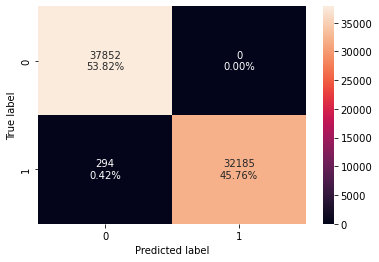

In [108]:
confusion_matrix_sklearn_with_threshold(logmodel, X_train, y_train)

In [109]:
model_performance_classification_sklearn_with_threshold(
    logmodel, X_train, y_train
)

C:\Users\kayaf\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


,Accuracy,Recall,Precision,F1,Ave_Precision
0,0.99582,0.990948,1.0,0.995453,0.995128


In [110]:
model_performance_classification_sklearn_with_threshold(
    logmodel, X_test, y_test
)

C:\Users\kayaf\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


,Accuracy,Recall,Precision,F1,Ave_Precision
0,0.995687,0.990635,1.0,0.995296,0.994948


Train and test sets performances are good and the model is not overfit. 

In [111]:
log_odds = logmodel.coef_[0]
pd.options.display.float_format = "{:.5f}".format
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

,HasID,Value_arc,PropertySize_arc,CollectedAmt_arc,BillingAmt_arc,AverageCollectedAmt_arc,DebtAmt_arc,WriteOffAmt_arc,CollectionRatio_arc,DebtBillingRatio_arc,TotalElectricityBill_arc,AverageBillingAmt_arc,Category_Business,Category_Educational,Category_Government,Category_Industry,Category_Infrastructure,Category_Municipal,Category_Place of Worship,Category_Public Benefit,Category_Residential,Category_Unknown
coef,1.08411,0.05109,-0.08418,-0.56786,-0.07275,0.64161,18.86667,8.28402,0.00389,0.72928,-0.10214,-0.30920,-1.10123,-0.50707,-0.68370,-0.69347,1.46806,-0.82280,-0.22666,-0.11318,-1.17527,-1.24223


In [112]:
odds = np.exp(logmodel.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(logmodel.coef_[0]) - 1) * 100

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,HasID,Value_arc,PropertySize_arc,CollectedAmt_arc,BillingAmt_arc,AverageCollectedAmt_arc,DebtAmt_arc,WriteOffAmt_arc,CollectionRatio_arc,DebtBillingRatio_arc,TotalElectricityBill_arc,AverageBillingAmt_arc,Category_Business,Category_Educational,Category_Government,Category_Industry,Category_Infrastructure,Category_Municipal,Category_Place of Worship,Category_Public Benefit,Category_Residential,Category_Unknown
Odds,2.95681,1.05242,0.91927,0.56674,0.92983,1.89953,156203107.95608,3960.08482,1.00390,2.07358,0.90290,0.73403,0.33246,0.60226,0.50474,0.49984,4.34079,0.43920,0.79719,0.89299,0.30873,0.28874
Change_odd%,195.68143,5.24222,-8.07340,-43.32641,-7.01673,89.95319,15620310695.60779,395908.48184,0.39016,107.35774,-9.70966,-26.59687,-66.75386,-39.77396,-49.52556,-50.01590,334.07925,-56.07993,-20.28051,-10.70098,-69.12652,-71.12605


In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
param_grid_lr = {
    'max_iter': [10, 20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': ['balanced']
}

In [115]:
model3 = LogisticRegression(solver="newton-cg", n_jobs=-1, random_state=1, max_iter=1000, class_weight='balanced')

In [116]:
model3.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1,
                   random_state=1, solver='newton-cg')

In [117]:
model_performance_classification_sklearn_with_threshold(
    model3, X_train, y_train
)

C:\Users\kayaf\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


,Accuracy,Recall,Precision,F1,Ave_Precision
0,0.99589,0.99110,1.00000,0.99553,0.99521


In [118]:
model_performance_classification_sklearn_with_threshold(
    model3, X_test, y_test
)

C:\Users\kayaf\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


,Accuracy,Recall,Precision,F1,Ave_Precision
0,0.99579,0.99085,1.00000,0.99540,0.99506


Upload the test data

In [119]:
df_test_raw=pd.read_csv("account_test.csv")

In [120]:
df_test=df_test_raw.copy()

In [121]:
df_test.head()

,AccID,CategoryID,Category,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID
0,d0390389-df62-4bf1-8659-bbc736ce777d,1,Residential,45000,291,2569,103,0,0,15104,0,0.00000,5.88000,0,1
1,b662b850-85e7-40d6-8fdd-3c2566a154dd,1,Residential,440000,794,9065,245,9065,2266,0,0,1.00000,0.00000,3132,1
2,41b6ebc4-569c-4c93-8cfa-3d85bce546ac,4,Agricultural,991700,3211597,397,397,0,0,0,0,0.00000,0.00000,0,0
3,6f0ecc23-da5c-4b84-bcd0-4fae4b3a5aec,1,Residential,180000,572,1578,63,5278,586,1741,0,3.35000,1.10000,0,0
4,6467f24e-d256-4e6d-8c0d-b726e8d80f48,1,Residential,43000,268,30,1,0,0,0,0,0.00000,0.00000,0,0


In [122]:
df_test.shape # lets prepate the test data to make suitable for the model

(33493, 15)

In [123]:
df_test.drop(columns=["AccID","CategoryID"], inplace=True)

In [124]:
df_test["Value" + "_arc"] = np.arcsinh(df_test["Value"])
df_test.drop("Value", axis=1, inplace=True)
df_test["PropertySize" + "_arc"] = np.arcsinh(df_test["PropertySize"])
df_test.drop("PropertySize", axis=1, inplace=True)
df_test["CollectedAmt" + "_arc"] = np.arcsinh(df_test["CollectedAmt"])
df_test.drop("CollectedAmt", axis=1, inplace=True)
df_test["AverageCollectedAmt" + "_arc"] = np.arcsinh(df_test["AverageCollectedAmt"])
df_test.drop("AverageCollectedAmt", axis=1, inplace=True)
df_test["DebtAmt" + "_arc"] = np.arcsinh(df_test["DebtAmt"])
df_test.drop("DebtAmt", axis=1, inplace=True)
df_test["WriteOffAmt" + "_arc"] = np.arcsinh(df_test["WriteOffAmt"])
df_test.drop("WriteOffAmt", axis=1, inplace=True)
df_test["CollectionRatio" + "_arc"] = np.arcsinh(df_test["CollectionRatio"])
df_test.drop("CollectionRatio", axis=1, inplace=True)
df_test["DebtBillingRatio" + "_arc"] = np.arcsinh(df_test["DebtBillingRatio"])
df_test.drop("DebtBillingRatio", axis=1, inplace=True)
df_test["TotalElectricityBill" + "_arc"] = np.arcsinh(df_test["TotalElectricityBill"])
df_test.drop("TotalElectricityBill", axis=1, inplace=True)
df_test["AverageBillingAmt" + "_arc"] = np.arcsinh(df_test["AverageBillingAmt"])
df_test.drop("AverageBillingAmt", axis=1, inplace=True)

In [125]:
df_test['PropertySize_arc'] = std_scaler.fit_transform(df_test[['PropertySize_arc']])
df_test['CollectedAmt_arc'] = std_scaler.fit_transform(df_test[['CollectedAmt_arc']])
df_test['AverageCollectedAmt_arc'] = std_scaler.fit_transform(df_test[['AverageCollectedAmt_arc']])
df_test['DebtAmt_arc'] = std_scaler.fit_transform(df_test[['DebtAmt_arc']])
df_test['WriteOffAmt_arc'] = std_scaler.fit_transform(df_test[['WriteOffAmt_arc']])
df_test['CollectionRatio_arc'] = std_scaler.fit_transform(df_test[['CollectionRatio_arc']])
df_test['DebtBillingRatio_arc'] = std_scaler.fit_transform(df_test[['DebtBillingRatio_arc']])
df_test['TotalElectricityBill_arc'] = std_scaler.fit_transform(df_test[['TotalElectricityBill_arc']])
df_test['AverageBillingAmt_arc'] = std_scaler.fit_transform(df_test[['AverageBillingAmt_arc']])
df_test['Value_arc'] = std_scaler.fit_transform(df_test[['Value_arc']])

In [126]:
df_test.head()

,Category,BillingAmt,HasID,Value_arc,PropertySize_arc,CollectedAmt_arc,AverageCollectedAmt_arc,DebtAmt_arc,WriteOffAmt_arc,CollectionRatio_arc,DebtBillingRatio_arc,TotalElectricityBill_arc,AverageBillingAmt_arc
0,Residential,2569,1,-0.04576,-0.24391,-1.10659,-1.09468,1.46629,-0.33205,-0.77699,1.26361,-0.56355,0.22307
1,Residential,9065,1,0.51627,0.05717,0.99467,1.15259,-0.76796,-0.33205,0.58797,-0.45917,1.63256,0.51491
2,Agricultural,397,0,0.71658,2.54838,-1.10659,-1.09468,-0.76796,-0.33205,-0.77699,-0.45917,-0.56355,0.67748
3,Residential,1578,0,0.29595,-0.04120,0.87876,0.79158,0.99836,-0.33205,2.20215,0.20318,-0.56355,0.05751
4,Residential,30,0,-0.05697,-0.26861,-1.10659,-1.09468,-0.76796,-0.33205,-0.77699,-0.45917,-0.56355,-1.27453


In [127]:
df_test_dummy= pd.get_dummies(df_test, columns=["Category"],drop_first=True)

In [128]:
df_test_dummy.head() #it looks good

,BillingAmt,HasID,Value_arc,PropertySize_arc,CollectedAmt_arc,AverageCollectedAmt_arc,DebtAmt_arc,WriteOffAmt_arc,CollectionRatio_arc,DebtBillingRatio_arc,TotalElectricityBill_arc,AverageBillingAmt_arc,Category_Business,Category_Educational,Category_Government,Category_Industry,Category_Infrastructure,Category_Municipal,Category_Place of Worship,Category_Public Benefit,Category_Residential,Category_Unknown
0,2569,1,-0.04576,-0.24391,-1.10659,-1.09468,1.46629,-0.33205,-0.77699,1.26361,-0.56355,0.22307,0,0,0,0,0,0,0,0,1,0
1,9065,1,0.51627,0.05717,0.99467,1.15259,-0.76796,-0.33205,0.58797,-0.45917,1.63256,0.51491,0,0,0,0,0,0,0,0,1,0
2,397,0,0.71658,2.54838,-1.10659,-1.09468,-0.76796,-0.33205,-0.77699,-0.45917,-0.56355,0.67748,0,0,0,0,0,0,0,0,0,0
3,1578,0,0.29595,-0.04120,0.87876,0.79158,0.99836,-0.33205,2.20215,0.20318,-0.56355,0.05751,0,0,0,0,0,0,0,0,1,0
4,30,0,-0.05697,-0.26861,-1.10659,-1.09468,-0.76796,-0.33205,-0.77699,-0.45917,-0.56355,-1.27453,0,0,0,0,0,0,0,0,1,0


In [129]:
df_test_dummy["Label"] = pd.Series(logmodel.predict(df_test_dummy))

C:\Users\kayaf\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- BillingAmt
Feature names seen at fit time, yet now missing:
- BillingAmt_arc

  warnings.warn(message, FutureWarning)


In [130]:
data_m=df_test_dummy["Label"]

In [131]:
data_m.head(50)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    0
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    0
47    1
48    1
49    1
Name: Label, dtype: int64

In [132]:
data_id= df_test_raw["AccID"]

In [133]:
result = pd.concat([data_id, data_m], axis=1)

In [134]:
result.to_csv("prediction_test_data4.csv")

Lets improve the model 

In [135]:
df3=df1x.copy()

NameError: name 'df1x' is not defined

drop the outliers

In [ ]:
df3.columns

In [ ]:
quartiles = np.quantile(df3['Value_arc'][df3['Value_arc'].notnull()], [.25, .75])
Value_arc_4iqr = 4 * (quartiles[1] - quartiles[0])
outliers_Value_arc = df3.loc[np.abs(df2['Value_arc'] - df3['Value_arc'].median()) > Value_arc_4iqr, 'Value_arc']
outliers_Value_arc

In [ ]:
df3.loc[np.abs(df3['Value_arc'] - df3['Value_arc'].median()) > Value_arc_4iqr, 'Value_arc'] = np.nan

In [ ]:
df3["Value_arc"].fillna(df3.Value_arc.median(), inplace=True)

In [ ]:
quartiles = np.quantile(df3['PropertySize_arc'][df3['PropertySize_arc'].notnull()], [.25, .75])
PropertySize_arc_4iqr = 4 * (quartiles[1] - quartiles[0])
outliers_PropertySize_arc = df3.loc[np.abs(df2['PropertySize_arc'] - df3['PropertySize_arc'].median()) > PropertySize_arc_4iqr, 'PropertySize_arc']
outliers_PropertySize_arc

In [ ]:
df3.loc[np.abs(df3['PropertySize_arc'] - df3['PropertySize_arc'].median()) > PropertySize_arc_4iqr, 'PropertySize_arc'] = np.nan

In [ ]:
df3["PropertySize_arc"].fillna(df3.PropertySize_arc.median(), inplace=True)

In [ ]:
quartiles = np.quantile(df3['CollectedAmt_arc'][df3['CollectedAmt_arc'].notnull()], [.25, .75])
CollectedAmt_arc_4iqr = 4 * (quartiles[1] - quartiles[0])
outliers_CollectedAmt_arc = df3.loc[np.abs(df2['CollectedAmt_arc'] - df3['CollectedAmt_arc'].median()) > CollectedAmt_arc_4iqr, 'CollectedAmt_arc']
outliers_CollectedAmt_arc

In [ ]:
quartiles = np.quantile(df3['AverageCollectedAmt_arc'][df3['AverageCollectedAmt_arc'].notnull()], [.25, .75])
AverageCollectedAmt_arc_4iqr = 4 * (quartiles[1] - quartiles[0])
outliers_AverageCollectedAmt_arc = df3.loc[np.abs(df2['AverageCollectedAmt_arc'] - df3['AverageCollectedAmt_arc'].median()) > AverageCollectedAmt_arc_4iqr, 'AverageCollectedAmt_arc']
outliers_AverageCollectedAmt_arc

In [ ]:
quartiles = np.quantile(df3['DebtAmt_arc'][df3['DebtAmt_arc'].notnull()], [.25, .75])
DebtAmt_arc_4iqr = 4 * (quartiles[1] - quartiles[0])
outliers_DebtAmt_arc = df3.loc[np.abs(df2['DebtAmt_arc'] - df3['DebtAmt_arc'].median()) > DebtAmt_arc_4iqr, 'DebtAmt_arc']
outliers_DebtAmt_arc

In [ ]:
quartiles = np.quantile(df3['WriteOffAmt_arc'][df3['WriteOffAmt_arc'].notnull()], [.25, .75])
WriteOffAmt_arc_4iqr = 4 * (quartiles[1] - quartiles[0])
outliers_WriteOffAmt_arc = df3.loc[np.abs(df2['WriteOffAmt_arc'] - df3['WriteOffAmt_arc'].median()) > WriteOffAmt_arc_4iqr, 'WriteOffAmt_arc']
outliers_WriteOffAmt_arc

In [ ]:
df3.drop(outliers_WriteOffAmt_arc.index, axis=0, inplace=True)

In [ ]:
quartiles = np.quantile(df3['CollectionRatio_arc'][df3['CollectionRatio_arc'].notnull()], [.25, .75])
CollectionRatio_arc_4iqr = 4 * (quartiles[1] - quartiles[0])
outliers_CollectionRatio_arc = df3.loc[np.abs(df2['CollectionRatio_arc'] - df3['CollectionRatio_arc'].median()) > CollectionRatio_arc_4iqr, 'CollectionRatio_arc']
outliers_CollectionRatio_arc

In [ ]:
quartiles = np.quantile(df3['DebtBillingRatio_arc'][df3['DebtBillingRatio_arc'].notnull()], [.25, .75])
DebtBillingRatio_arc_4iqr = 4 * (quartiles[1] - quartiles[0])
outliers_DebtBillingRatio_arc = df3.loc[np.abs(df2['DebtBillingRatio_arc'] - df3['DebtBillingRatio_arc'].median()) > DebtBillingRatio_arc_4iqr, 'DebtBillingRatio_arc']
outliers_DebtBillingRatio_arc

In [ ]:
quartiles = np.quantile(df3['TotalElectricityBill_arc'][df3['TotalElectricityBill_arc'].notnull()], [.25, .75])
TotalElectricityBill_arc_4iqr = 4 * (quartiles[1] - quartiles[0])
outliers_TotalElectricityBill_arc = df3.loc[np.abs(df2['TotalElectricityBill_arc'] - df3['TotalElectricityBill_arc'].median()) > TotalElectricityBill_arc_4iqr, 'TotalElectricityBill_arc']
outliers_TotalElectricityBill_arc

In [ ]:
quartiles = np.quantile(df3['AverageBillingAmt_arc'][df3['AverageBillingAmt_arc'].notnull()], [.25, .75])
AverageBillingAmt_arc_4iqr = 4 * (quartiles[1] - quartiles[0])
outliers_AverageBillingAmt_arc = df3.loc[np.abs(df2['AverageBillingAmt_arc'] - df3['AverageBillingAmt_arc'].median()) > AverageBillingAmt_arc_4iqr, 'AverageBillingAmt_arc']
outliers_AverageBillingAmt_arc

In [ ]:
df3.shape

In [ ]:
X = df3.drop(["Label"], axis=1)

Y = df3["Label"]

X = pd.get_dummies(X, columns=["Category"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

In [ ]:
log = LogisticRegression(solver="newton-cg", random_state=1)
logmodel2 = log.fit(X_train, y_train)

In [ ]:
confusion_matrix_sklearn_with_threshold(logmodel2, X_train, y_train)

In [ ]:
model_performance_classification_sklearn_with_threshold(
    logmodel2, X_train, y_train
)

In [ ]:
model_performance_classification_sklearn_with_threshold(
    logmodel2, X_test, y_test
)

In [ ]:
model_performance_classification_sklearn_with_threshold(
    logmodel2, X_train, y_train, threshold=0.2
)

In [ ]:
model_performance_classification_sklearn_with_threshold(
    logmodel2, X_test, y_test, threshold=0.2
)

In [ ]:
df_test_dummy.head()

In [ ]:
df4=df1.copy

In [ ]:
X = df3.drop(["Label"], axis=1)

Y = df3["Label"]

X = pd.get_dummies(X, columns=["Category"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging_wt = BaggingClassifier(base_estimator=LogisticRegression(solver="newton-cg",random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

In [ ]:
model_performance_classification_sklearn_with_threshold(
    bagging_wt, X_train, y_train
)

In [ ]:
model_performance_classification_sklearn_with_threshold(
    bagging_wt, X_test, y_test
)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
ab_classifier = AdaBoostClassifier(base_estimator=LogisticRegression(solver="newton-cg",random_state=1, ), random_state=1)
ab_classifier.fit(X_train,y_train)


In [ ]:
model_performance_classification_sklearn_with_threshold(
    ab_classifier, X_train, y_train
)

In [ ]:
model_performance_classification_sklearn_with_threshold(
    ab_classifier, X_test, y_test
)

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

In [ ]:
model_performance_classification_sklearn_with_threshold(
    gb_classifier, X_train, y_train)

In [ ]:
model_performance_classification_sklearn_with_threshold(
    gb_classifier, X_test, y_test)
